In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# y_train_full = keras.utils.to_categorical(y_train_full)
# y_test = keras.utils.to_categorical(y_test)

In [4]:
# scaling the pixel intensities between 0 and 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
#Building the NN
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [8]:
# #Alternative way to build the same model
# model = keras.models.Sequential([
#         keras.layers.Flatten(input_shape=[28,28]),
#         keras.layers.Dense(300, activation='relu'),
#         keras.layers.Dense(100, activation='relu'),
#         keras.layers.Dense(10, activation='softmax')
# ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# accessing some model details
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
weights, biases = hidden1.get_weights()

In [12]:
weights
weights.shape

(784, 300)

In [13]:
model.compile(
    loss = 'sparse_categorical_crossentropy',           # because we have sparse labels, for one hot encoding we would have used categorical cross entropy
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7205 - accuracy: 0.7642 - val_loss: 0.5102 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4875 - accuracy: 0.8293 - val_loss: 0.4626 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4416 - accuracy: 0.8444 - val_loss: 0.4131 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4131 - accuracy: 0.8542 - val_loss: 0.4035 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3926 - accuracy: 0.8607 - val_loss: 0.3853 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8660 - val_loss: 0.3718 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8701 - val_loss: 0.3661 - val_accuracy:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

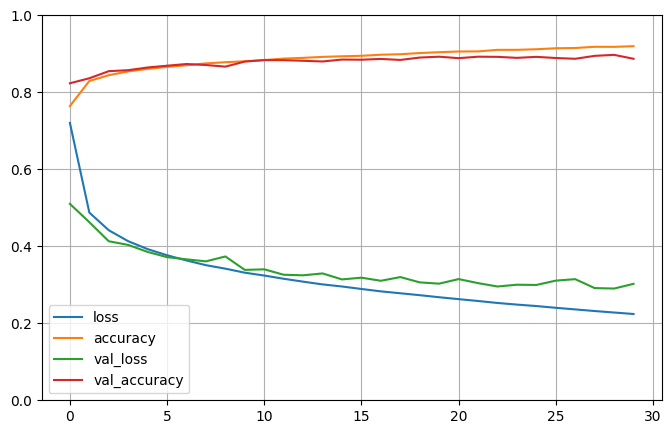

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 57.9064 - accuracy: 0.8515


[57.90640640258789, 0.8514999747276306]